# Load and Augmentation

본 예제에서는 데이터 로더를 정의하고 데이터에 증강(Augmentation)을 적용합니다.

## 라이브러리 가져오기

모듈이란 함수나 변수 또는 클래스를 모아 놓은 파일입니다. 모듈은 다른 파이썬 프로그램에서 불러와 사용할 수 있게끔 만든 파이썬 파일이라고도 할 수 있습니다.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as T

import numpy as np
from PIL import Image
from pathlib import Path

import matplotlib.pyplot as plt
import glob
import cv2
%matplotlib inline

## 데이터 증강

데이터 증강(Data Augmentation)은 새로운 데이터를 실제로 수집하지 않고도 모델이 사용할 수 있는 데이터의 다양성을 높이는 방법입니다.

![image](https://hoya012.github.io/assets/img/Augmentation/2.PNG)

https://pytorch.org/vision/stable/transforms.html

--2024-11-06 07:13:43--  https://dimg.donga.com/wps/NEWS/IMAGE/2022/01/28/111500268.2.jpg
Resolving dimg.donga.com (dimg.donga.com)... 1.248.254.68, 1.248.254.70, 1.248.254.84
Connecting to dimg.donga.com (dimg.donga.com)|1.248.254.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31357 (31K) [image/jpeg]
Saving to: ‘111500268.2.jpg’

111500268.2.jpg     100%[===================>]  30.62K   183KB/s    in 0.2s    

2024-11-06 07:13:44 (183 KB/s) - ‘111500268.2.jpg’ saved [31357/31357]



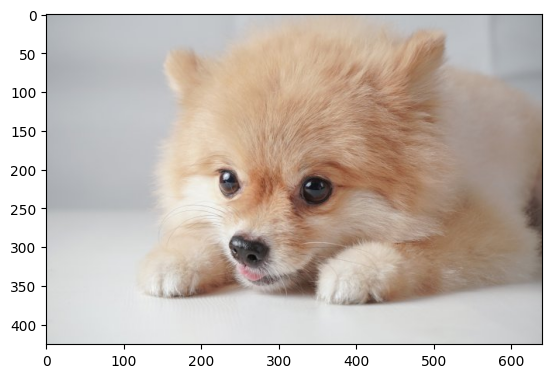

In [ ]:
!wget https://dimg.donga.com/wps/NEWS/IMAGE/2022/01/28/111500268.2.jpg

path = '/content/'
ext = ['png', 'jpg', 'jpeg', 'gif']

files = []
[files.extend(glob.glob(path + '*.' + e)) for e in ext]
images = [cv2.imread(file) for file in files]

for index in range(len(images)):
    image = images[index]
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images[index] = img

    plt.imshow(img)
    plt.show()

In [ ]:
plt.rcParams["savefig.bbox"] = 'tight'
image = images[0]
orig_img = Image.fromarray(image)
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15), squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

### Pad

이미지의 가장 자리 부분에 특정 값으로 채웁니다.

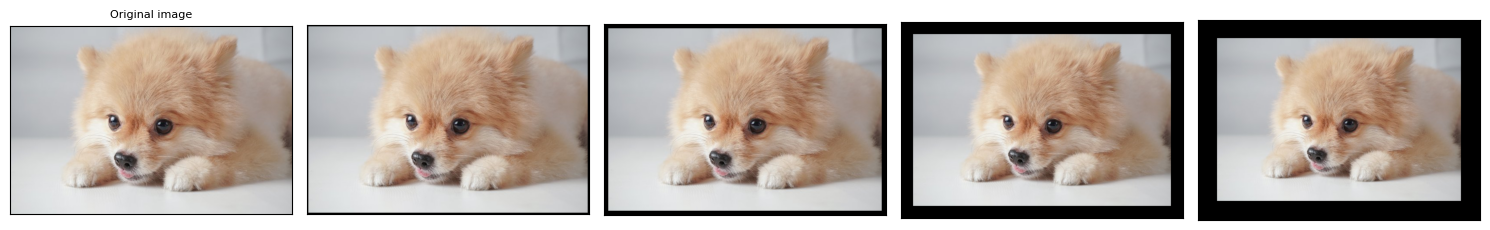

In [ ]:
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

### Resize

이미지의 크기를 변경합니다.

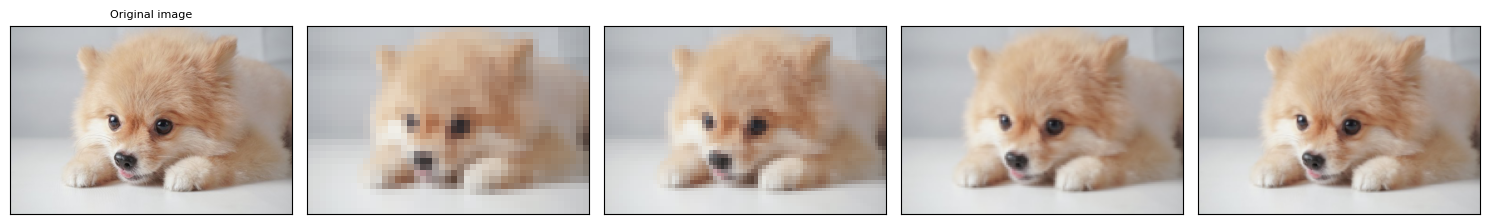

In [ ]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, 150)]
plot(resized_imgs)

### CenterCrop

이미지의 중앙에서 주어진 크기만큼 이미지를 자릅니다.

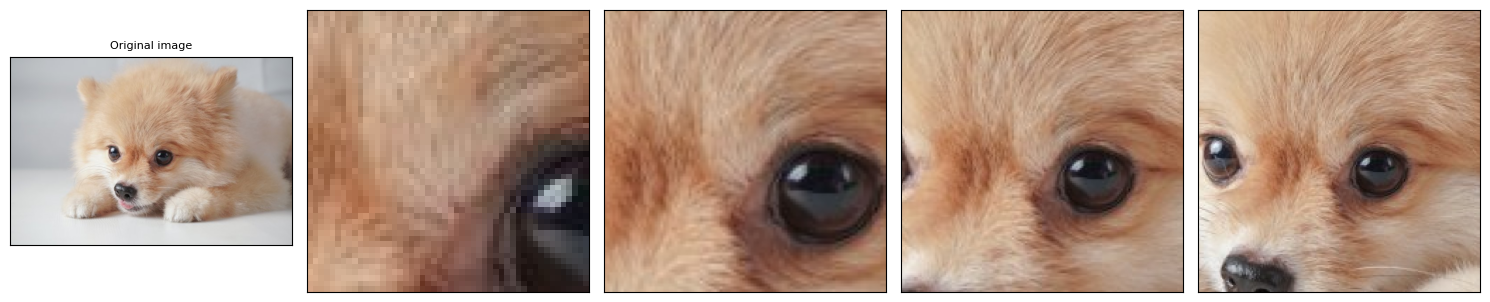

In [ ]:
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (50, 100, 150, 200)]
plot(center_crops)

### FiveCrop

주어진 이미지의 모서리 부분과 중앙 부분을 자릅니다.

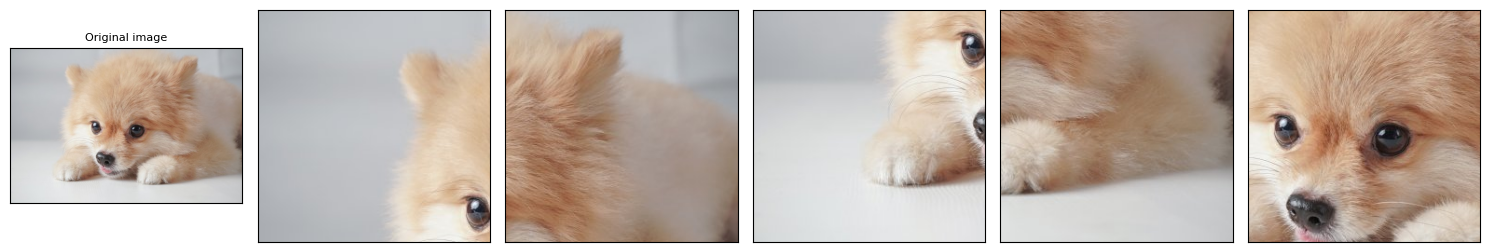

In [ ]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(250, 250))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

### Grayscale

이미지를 회색조로 변경합니다.

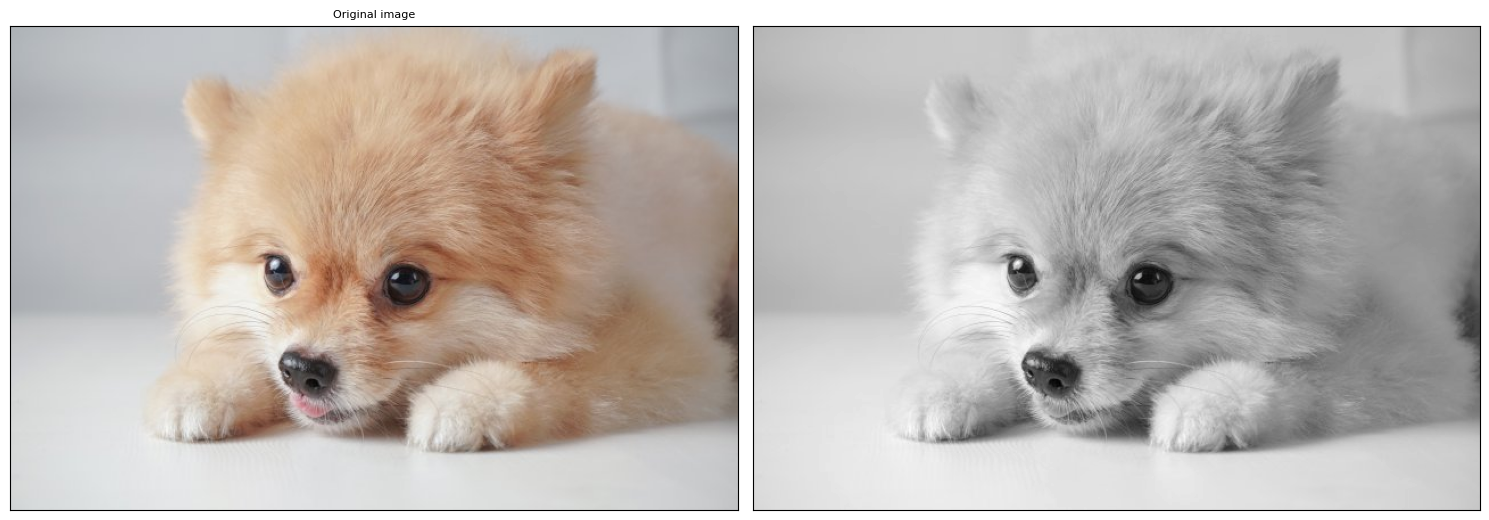

In [ ]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

### ColorJitter

이미지의 밝기, 채도, 명도등을 매번 실행 할때 마다 다르게 변경합니다.

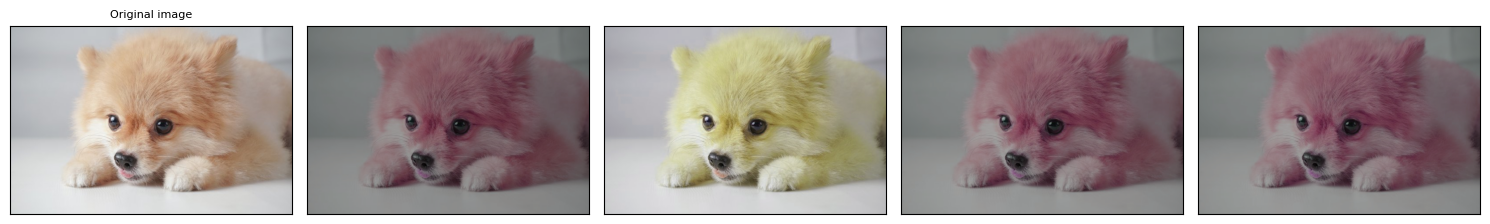

In [ ]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

### GaussianBlur

이미지에 가우시안 흐림 효과를 적용합니다.

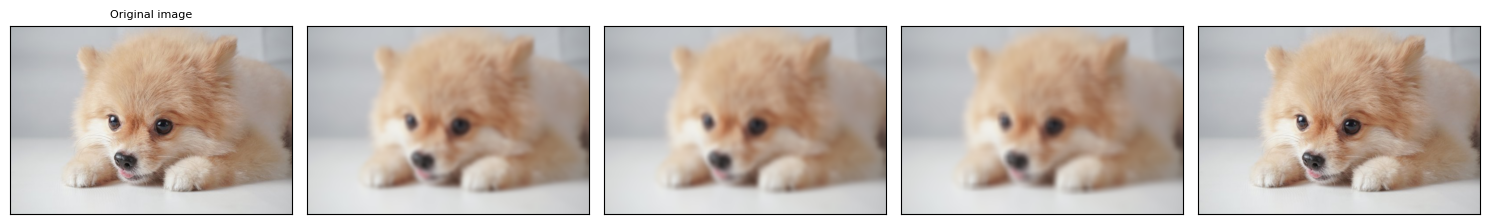

In [ ]:
blurrer = T.GaussianBlur(kernel_size=(15, 19), sigma=(0.1, 10))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

### RandomRotation

이미지를 회전합니다.

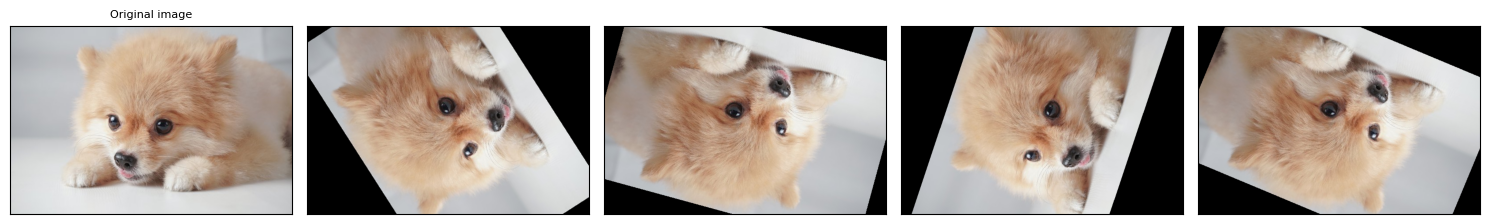

In [ ]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

# 참조

---

https://hoya012.github.io/blog/Image-Data-Augmentation-Overview/   
https://d2.naver.com/helloworld/3773258